
<h1 style="font-family:times new roman;"> <center>Bellabeat Case Study </center> </h1>

<p><center style="color:#159364; font-family:times new roman; font-size:16px">Google's Data Analytics Certificate Capstone: Exploratory Analysis of Health Tracker Data</center></p>

***

<h2 style='font-family:times new roman'>Introduction</h2>

<p style='font-size:16px;font-family:times new roman'>The purpose of this case study is to analyze consumer data and provide insights to help guide a company’s marketing strategy. Bellabeat is successful, small company that manufactures high-tech health products for women. Its co-founder and chief creative officer, Urška Sršen, believes analyzing smart device data can be helpful in discovering trends in consumer usage. By analyzing user data, we were able to identify some trends in user sleep habits, inactivity and activity levels. This analysis will describe the trends as well as provide a high-level recommendation for marketing Bellabeat’s products.</p>

<h2 style= 'font-family:times new roman'>Data</h2>


<p style='font-size:16px;font-family:times new roman'>The dataset used in this analysis is available under a public domain license through Kaggle [1]. The dataset contains personal fitness tracker information collected from thirty Fitbit users. Fitbit is a company that specializes in wearable fitness and health technology. The data includes users’ active minutes. According to Fitbit, active minutes are earned through ten or more minutes of continuous moderate to intense activity [2]. Additionally, the dataset contains information on users’ sleep duration. Since the data was generated from a survey of only thirty Fitbit users, its  sample size is limited. However, identifying trends within the Fitbit data can still be helpful in determining how to best market Bellabeat products since both companies have similar target consumers.</p>


<h2 style = 'font-family:times new roman'>Settting Up Enviroment in R </h2>

<p style='font-size:16px;font-family:times new roman'> Load packages and dataset into R.</p>

In [1]:
library(tidyverse)
library(readr)
library(plyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact




<p style='font-size:16px;font-family:times new roman'> Load data files. </p>

In [2]:
dir = '../input/fitbit/Fitabase Data 4.12.16-5.12.16'
fit_files = list.files(path=dir, pattern = '*.csv',full.names = TRUE)

In [3]:
# # Create data frame with user's sleep data.
sleep_df <- read_csv(fit_files[17])
head(sleep_df)

# # Create data frame with user's activity data.
activity_df <- read_csv(fit_files[1])
head(activity_df)


── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  SleepDay = col_character(),
  TotalSleepRecords = col_double(),
  TotalMinutesAsleep = col_double(),
  TotalTimeInBed = col_double()
)




Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityDate = col_character(),
  TotalSteps = col_double(),
  TotalDistance = col_double(),
  TrackerDistance = col_double(),
  LoggedActivitiesDistance = col_double(),
  VeryActiveDistance = col_double(),
  ModeratelyActiveDistance = col_double(),
  LightActiveDistance = col_double(),
  SedentaryActiveDistance = col_double(),
  VeryActiveMinutes = col_double(),
  FairlyActiveMinutes = col_double(),
  LightlyActiveMinutes = col_double(),
  SedentaryMinutes = col_double(),
  Calories = col_double()
)




Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


<h2 style ='font-family:times new roman'>Data Cleaning</h2>

In [4]:
# # Checking that data types are correct.
str(sleep_df)
str(activity_df)

spec_tbl_df[,5] [413 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                : num [1:413] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr [1:413] "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : num [1:413] 1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: num [1:413] 327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : num [1:413] 346 407 442 367 712 320 377 364 384 449 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   SleepDay = col_character(),
  ..   TotalSleepRecords = col_double(),
  ..   TotalMinutesAsleep = col_double(),
  ..   TotalTimeInBed = col_double()
  .. )
spec_tbl_df[,15] [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:94

In [5]:
# # Checking for missing values.
count(is.na(sleep_df)== TRUE)
count(is.na(activity_df)==TRUE)

x.Id,x.SleepDay,x.TotalSleepRecords,x.TotalMinutesAsleep,x.TotalTimeInBed,freq
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>
FALSE,FALSE,FALSE,FALSE,FALSE,413


x.Id,x.ActivityDate,x.TotalSteps,x.TotalDistance,x.TrackerDistance,x.LoggedActivitiesDistance,x.VeryActiveDistance,x.ModeratelyActiveDistance,x.LightActiveDistance,x.SedentaryActiveDistance,x.VeryActiveMinutes,x.FairlyActiveMinutes,x.LightlyActiveMinutes,x.SedentaryMinutes,x.Calories,freq
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,940


In [6]:
# # Changing minutes into hours in sleep dataframe.
sleep_df<- sleep_df %>% 
    mutate(total_hours_asleep= TotalMinutesAsleep/60) %>% 
    mutate(total_hours_in_bed = TotalTimeInBed/60)  

<h2 style = 'font-family:times new roman'>Analysis</h2>

<p style='font-size:16px;font-family:times new roman'>In order to identify any possible trends, the  dataframes need to be aggregated so that it represents average values for each user. </p>

In [7]:
# # Aggregate data in order to find the average sleep duration for each user.
sleep_summary <- aggregate(cbind(total_hours_asleep,total_hours_in_bed)~Id,
                           sleep_df,mean)
colnames(sleep_summary)[2:3] <- c('avg_hours_asleep','avg_hours_in_bed')
sleep_summary[,-1] <- round(sleep_summary[,-1],0)
                                         
 head(sleep_summary)

,Id,avg_hours_asleep,avg_hours_in_bed
,<dbl>,<dbl>,<dbl>
1,1503960366,6,6
2,1644430081,5,6
3,1844505072,11,16
4,1927972279,7,7
5,2026352035,8,9
6,2320127002,1,1


In [8]:
# # Aggregate data in order to find average activity minutes for each user.

activity_summary <- aggregate(cbind(VeryActiveMinutes, FairlyActiveMinutes, 
                    LightlyActiveMinutes, SedentaryMinutes)~Id,activity_df,mean)
colnames(activity_summary)[2:5] <- c('avg_very_active_minutes', 
                                    'avg_fairly_active_minutes',
                                    'avg_lightly_active_minutes', 
                                    'avg_sedentary_minutes')

activity_summary[,-1] <-round(activity_summary[,-1],0)
head(activity_summary)

,Id,avg_very_active_minutes,avg_fairly_active_minutes,avg_lightly_active_minutes,avg_sedentary_minutes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,39,19,220,848
2,1624580081,9,6,153,1258
3,1644430081,10,21,178,1162
4,1844505072,0,1,115,1207
5,1927972279,1,1,39,1317
6,2022484408,36,19,257,1113


<p style='font-size:16px;font-family:times new roman'>Merging the two dataframes.</p>

In [9]:
# # Merge both dataframes using the Id column as the link.
merged_df <- merge(sleep_summary, activity_summary, by='Id')

# # New column that identifies users with 800 or less sedentary minutes and those with more than 800 minutes.
merged_df$sedentary_lvl[merged_df$avg_sedentary_minutes<=800] <- 'less_sedentary'
merged_df$sedentary_lvl[merged_df$avg_sedentary_minutes>800] <- 'more_sedentary'

***

<p style='font-size:16px;font-family:times new roman'>The importance of sleep for maintaining good health cannot be overestimated. According to the Center for Disease Control, sleep deficiency is linked to many chronic diseases and conditions [3]. Devices, like Bellabeat’s, make it convenient for users to track their sleep.  The data showed that there was a higher frequency of users who were ‘less sedentary’ with an average sleep duration of 7 to 9 hours. Users with 800 or less sedentary minutes are categorized as less sedentary in the graph below. Those with more than 800 minutes are categorized as more sedentary. The data shows that the 'more sedentary' users had greater variance in their sleep duration ranges, with several users logging less than 6 hours of sleep. However, it should be noted that the dataset has a very small sample size, and that the correlation coefficient indicates only a weak association between the two variables. Another analysis should be done with a larger dataset. Then it may be determined whether users who increase their activity levels track consistent and adequate sleep hours. </p>

[1] -0.3363056

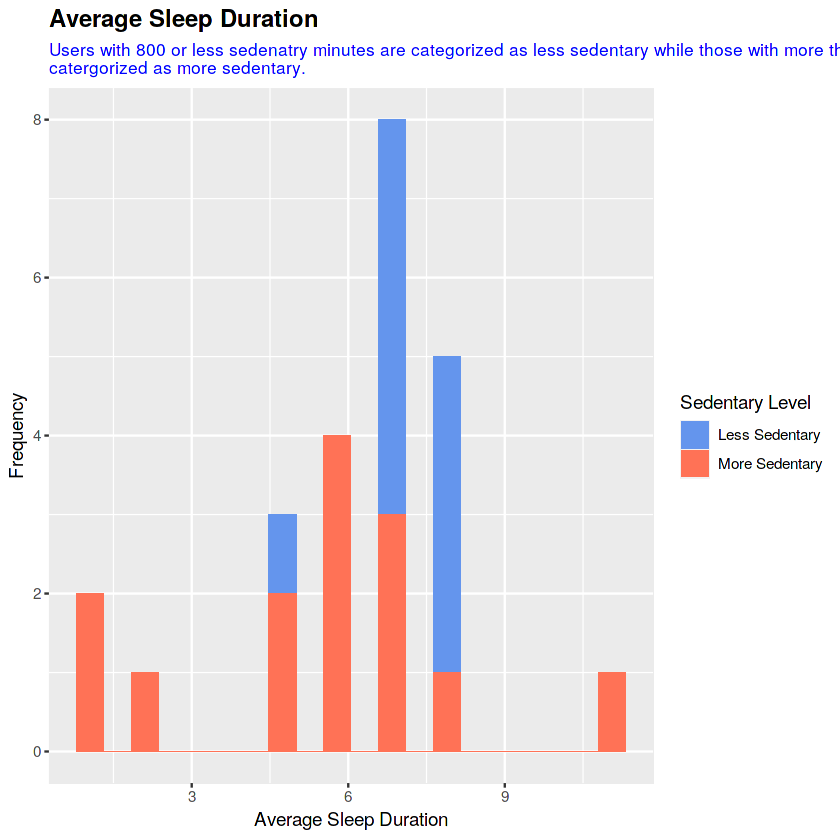

In [10]:
ggplot(merged_df, aes(x=avg_hours_asleep, fill=sedentary_lvl)) +
geom_histogram(bins=20) +labs(title= 'Average Sleep Duration',
subtitle = 'Users with 800 or less sedenatry minutes are categorized as less sedentary while those with more than 800 minutes are
catergorized as more sedentary.', x = 'Average Sleep Duration', y = 'Frequency')+
theme(plot.title = element_text(size = 14, face = "bold"),
        plot.subtitle = element_text(color = "blue", size = 10)) +
scale_fill_manual(name = "Sedentary Level",labels = c("Less Sedentary",'More Sedentary'),
                  values = c("cornflowerblue",'coral1'))

# # Correlation Coefficient.
cor(merged_df$avg_sedentary_minutes,
    merged_df$avg_hours_asleep,
    method=c("pearson", "kendall", "spearman"))

<p style='font-size:16px;font-family:times new roman'>In addition to looking at the correlation between inactivtiy and sleep, identifying if a relationship between user's MET values and their acttivity can provide useful insights. </p>

In [11]:
# # Loadingg the METs data set.
met_df <- read_csv(fit_files[13])
View(met_df)
head(met_df)

# # Aggregating METs data.
met_df<-separate(met_df,ActivityMinute, c("Date", "Time",'AM/PM'), sep = " ")

# # Get the daily METs for every user by summing the activity minute data.
mets <- aggregate(met_df$METs, by=list(Id=met_df$Id, Date =met_df$Date), FUN=sum)

# # Get the average METs for each user. 
mets<- aggregate(mets$x, by=list(Id=mets$Id), FUN=mean)
colnames(mets)[2] <- 'avg_mets'
mets$avg_mets <- round(mets$avg_mets, 0)


── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityMinute = col_character(),
  METs = col_double()
)




Id,ActivityMinute,METs
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,10
1503960366,4/12/2016 12:01:00 AM,10
1503960366,4/12/2016 12:02:00 AM,10
1503960366,4/12/2016 12:03:00 AM,10
1503960366,4/12/2016 12:04:00 AM,10
1503960366,4/12/2016 12:05:00 AM,12
1503960366,4/12/2016 12:06:00 AM,12
1503960366,4/12/2016 12:07:00 AM,12
1503960366,4/12/2016 12:08:00 AM,12


Id,ActivityMinute,METs
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,10
1503960366,4/12/2016 12:01:00 AM,10
1503960366,4/12/2016 12:02:00 AM,10
1503960366,4/12/2016 12:03:00 AM,10
1503960366,4/12/2016 12:04:00 AM,10
1503960366,4/12/2016 12:05:00 AM,12


In [12]:
# # Merging the MET dataframe with the other two dataframes.
merged_df <- merge(merged_df, mets, by='Id')
head(merged_df)

,Id,avg_hours_asleep,avg_hours_in_bed,avg_very_active_minutes,avg_fairly_active_minutes,avg_lightly_active_minutes,avg_sedentary_minutes,sedentary_lvl,avg_mets
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1503960366,6,6,39,19,220,848,more_sedentary,23903
2,1644430081,5,6,10,21,178,1162,more_sedentary,19976
3,1844505072,11,16,0,1,115,1207,more_sedentary,16805
4,1927972279,7,7,1,1,39,1317,more_sedentary,15169
5,2026352035,8,9,0,0,257,689,less_sedentary,19853
6,2320127002,1,1,1,3,198,1220,more_sedentary,18725


<p style='font-size:16px;font-family:times new roman'>In addition to sleep, the dataset contained information on users’ MET values. Healthline defines METs as ‘a ratio of your working metabolic rate relative to your resting metabolic rate’ [4]. Activities that lead to higher muscle expenditure have a higher MET value. This metric is helpful because it provides users a way to track their workout’s intensity. This information can help people determine whether they are getting at least 150 minutes per week of moderate-intense activity, as is recommended by the American Heart Association [5] and the UK’s National Health Service [6]. The data indicates a positive correlation between average ‘very active’ minutes and METs for users. Fitbit uses active minutes, earned through 10 minutes or more of continuous moderate-to-intense activity, to track activity level [2]. As shown on the plot below; users with more than fifty ‘very active’ minutes had the highest MET values.</p>

`geom_smooth()` using formula 'y ~ x'



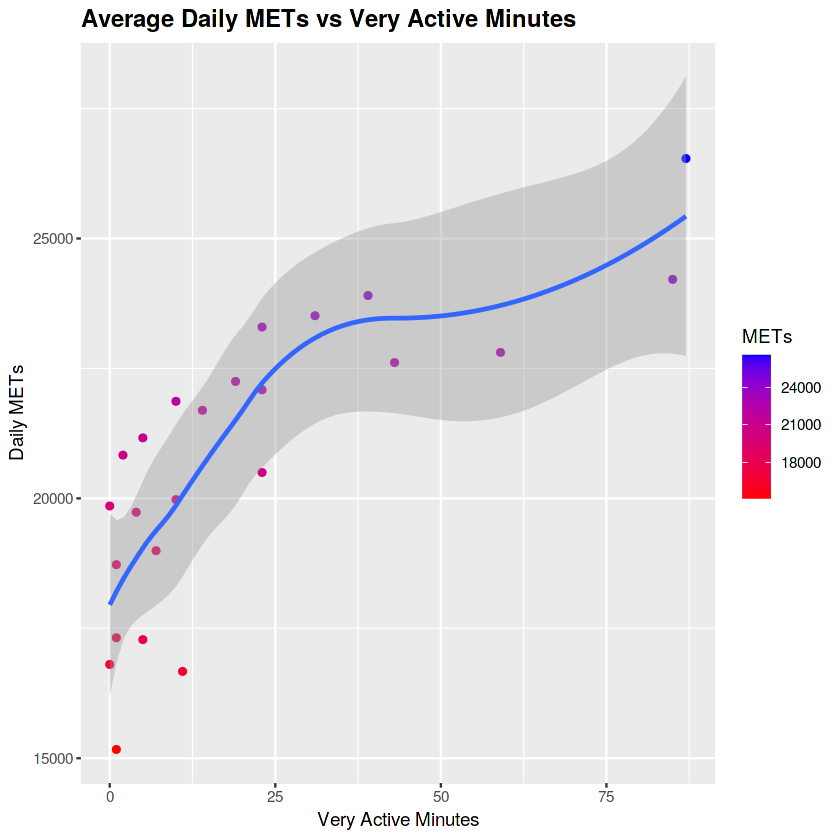

In [13]:
# # Is there a correlation between METs and active minutes?
ggplot(data =merged_df, aes(
    x = avg_very_active_minutes,
    y = avg_mets, 
    color = avg_mets)) + geom_point() +
    scale_color_gradient(low="red", high="blue") + geom_smooth(method = 'loess')+
labs(title= 'Average Daily METs vs Very Active Minutes',
     x = 'Very Active Minutes', y = 'Daily METs', color = 'METs')+
    theme(plot.title = element_text(size = 14, face = "bold")) 

<p style='font-size:16px;font-family:times new roman'> Is there a correlation between the number of steps user takes and their MET values? </p>

In [14]:
# # Loading the steps dataset.
steps_df <- read_csv(fit_files[4])

# # Aggregating the steps data.
steps_summary <- aggregate(StepTotal~Id, steps_df, mean)
colnames(steps_summary)[2] <- 'AverageDailySteps'


── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityDay = col_character(),
  StepTotal = col_double()
)




In [15]:
## Adding steps data to merged dataframe.
merged_df <- merge(merged_df,steps_summary, by='Id')
head(merged_df)

,Id,avg_hours_asleep,avg_hours_in_bed,avg_very_active_minutes,avg_fairly_active_minutes,avg_lightly_active_minutes,avg_sedentary_minutes,sedentary_lvl,avg_mets,AverageDailySteps
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,1503960366,6,6,39,19,220,848,more_sedentary,23903,12116.742
2,1644430081,5,6,10,21,178,1162,more_sedentary,19976,7282.967
3,1844505072,11,16,0,1,115,1207,more_sedentary,16805,2580.065
4,1927972279,7,7,1,1,39,1317,more_sedentary,15169,916.129
5,2026352035,8,9,0,0,257,689,less_sedentary,19853,5566.871
6,2320127002,1,1,1,3,198,1220,more_sedentary,18725,4716.871


<p style='font-size:16px;font-family:times new roman'>Another interesting trend was observed when evaluating the relationship between average daily steps and METs. Tracking steps can be beneficial for everyone, particularly for those who are more comfortable engaging in low to moderate physical activities like walking. A positive correlation exists between users’ average daily steps and their MET values.</p>

`geom_smooth()` using formula 'y ~ x'



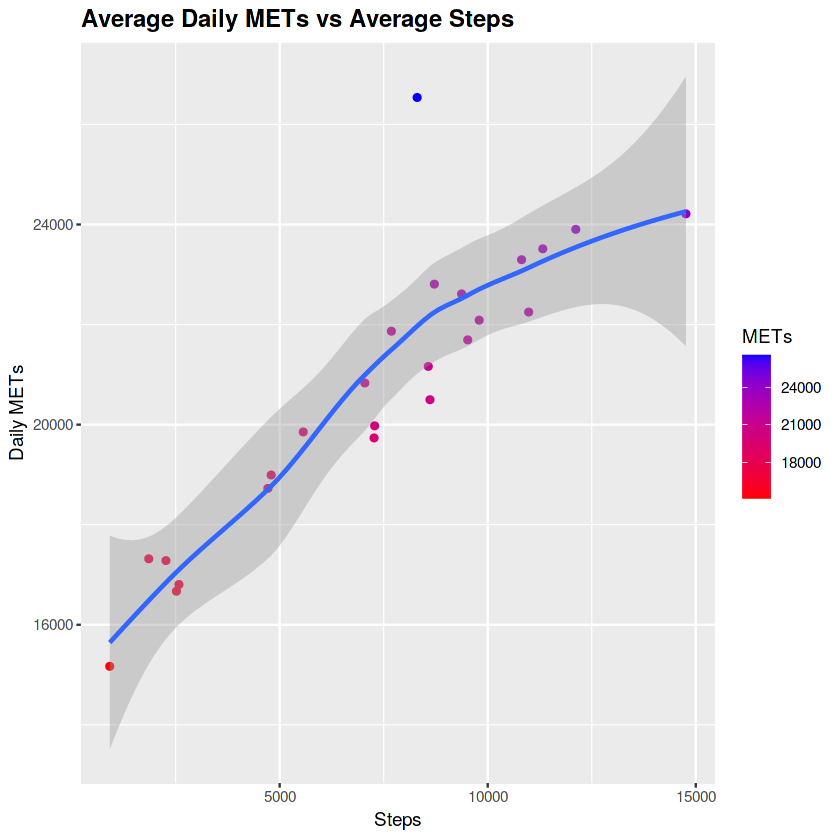

In [16]:
# # Correlation between mets and steps.
ggplot(data= merged_df, aes(
    x = AverageDailySteps,
    y = avg_mets,
    color = avg_mets)) + geom_point() +
    scale_color_gradient(low="red", high="blue") + geom_smooth(method = 'loess')+
    labs(title= 'Average Daily METs vs Average Steps',
         x = 'Steps', y = 'Daily METs', color = 'METs')+
    theme(plot.title = element_text(size = 14, face = "bold")) 

<h2 style='font-family:times new roman'> Recommendation</h2>

<p style='font-size:16px;font-family:times new roman'>Bellabeat’s mission is to create technology that empowers women with knowledge about their health and habits. The trends identified within this analysis have provided insight into how consumers are using their devices. Bellabeat should focus on marketing the way their wellness products can help people take control of their health and improve habits. For example, women who struggle with getting enough sleep could benefit from reviewing the sleep data tracked by Bellabeat’s classic wellness tracker, Leaf. Dr. Alan Schwartz, director of the Sleep Disorders Center at Johns Hopkins Bayview Medical Center, states how tracking devices can help people recognize patterns in their sleep and reflect on their habits [7]. People with varying health priorities can benefit from having access to the range of health metrics tracked within the Bellabeat app. Some users may find that they can link their sleep deficiencies to long stretches of inactivity throughout their day. Fitness enthusiasts can focus on tracking their METs and choose to engage in more intense workouts. As well as those who want to simplify their fitness routine; they can review metrics like daily steps. It is my recommendation that Bellabeat focuses on marketing that their wellness trackers provide users with an abundance of data that can help users take control of their habits and achieve their personal health goals.</p>

<h2 style='font-family:times new roman'> Tableau Dashboard</h2>

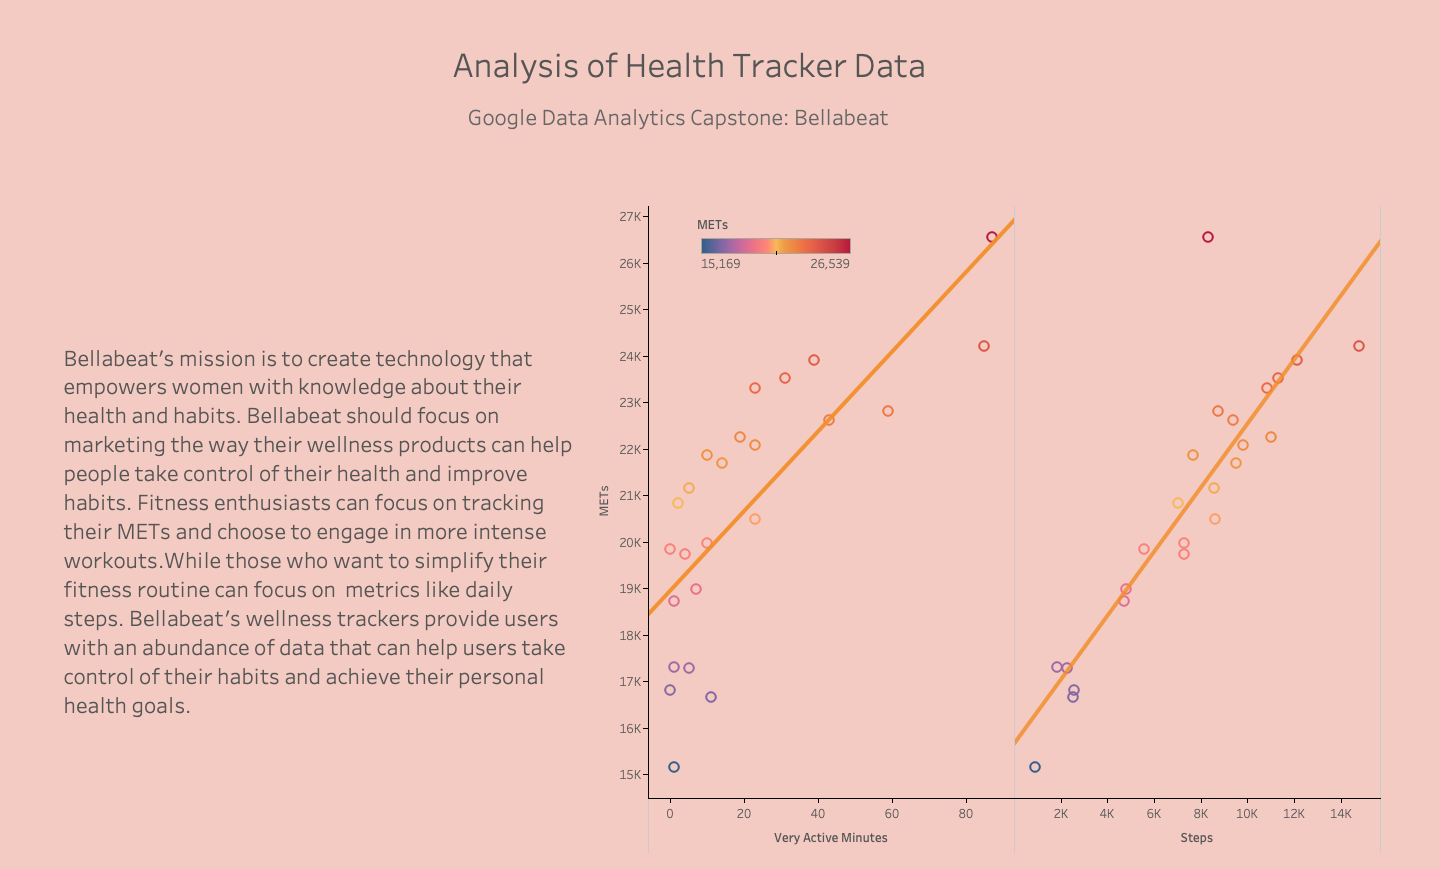

<h2 style='font-family:times new roman'>References</h2>


1. [Möbius. (2020, December 16). FitBit Fitness Tracker Data.Kaggle.](https://www.kaggle.com/arashnic/fitbit)  
2. [What are Active Zone Minutes or active minutes on my Fitbit Device. Fitbit MyHelp.](https://help.fitbit.com/articles/en_US/Help_article/Search.htm?q=Active%20minutes)
3. [Sleep and Sleep Disorders. Center for Disease Control.](https://www.cdc.gov/sleep/index.html)  

4. [Roland, James. (21, October 2019).What Exactly are METs and What Should You Know About Them? Healthline.](https://www.healthline.com/health/what-are-mets#definition)  

5. [American Heart Association Recommendations for Physical Activity in Adults and Kids. American Heart Association.](https://www.heart.org/en/healthy-living/fitness/fitness-basics/aha-recs-for-physical-activity-in-adults)  
6. [Physical Activity Guidelines for Adults Aged 19 to 64. National Health Service](https://www.nhs.uk/live-well/exercise/)
7. [Do Sleep Trackers Really Work. John Hopkins Medicine: Health.](https://www.hopkinsmedicine.org/health/wellness-and-prevention/do-sleep-trackers-really-work)
